In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data_no_bg.csv')

# Supression des plantes saines 

data.dropna(inplace = True)
data = data.reset_index(drop=True)

In [2]:
display(data.head())
display(data.info())
display(len(data.espece.unique()),' espèces : ', data.espece.unique())
display(len(data.nom_maladie.unique()), ' maladies : ', data.nom_maladie.unique())

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48001 entries, 0 to 48000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_path     48001 non-null  object
 1   espece       48001 non-null  object
 2   malade       48001 non-null  bool  
 3   nom_maladie  48001 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.1+ MB


None

11

' espèces : '

array(['Apple', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape',
       'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Squash',
       'Strawberry', 'Tomato'], dtype=object)

20

' maladies : '

array(['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew',
       'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_',
       'Northern_Leaf_Blight', 'Esca_(Black_Measles)',
       'Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Haunglongbing_(Citrus_greening)', 'Bacterial_spot',
       'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
       'Target_Spot', 'Tomato_mosaic_virus',
       'Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

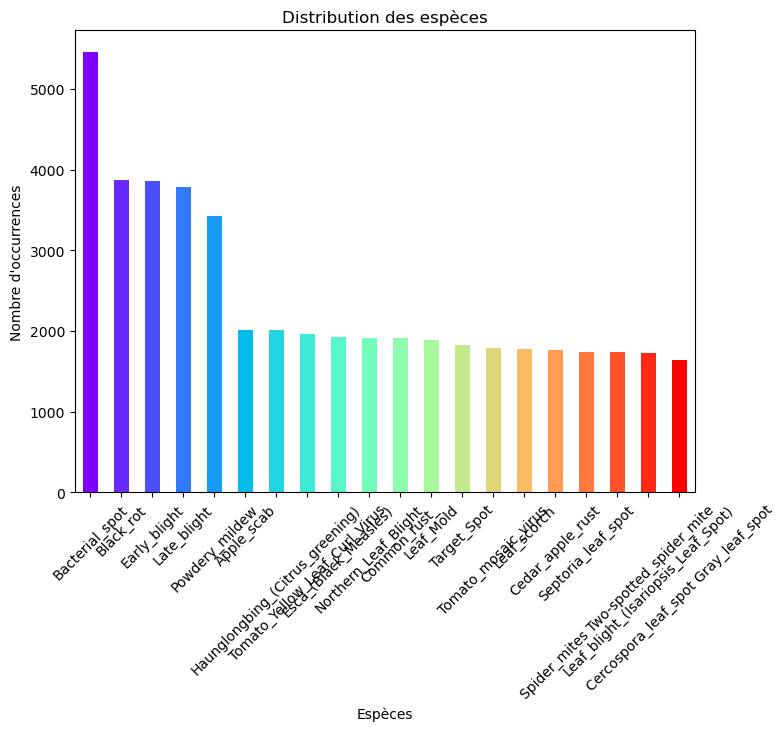

In [3]:
counts = data['nom_maladie'].value_counts()

num_colors = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color = colors)
plt.title("Distribution des espèces")
plt.xlabel("Espèces")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

## Classification par RandomForest

In [4]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fonction qui extrait l'histogramme des images 

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(data['img_path'], data['nom_maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [5]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(random_state=42)

In [6]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.822 total time=   2.0s
[CV 2/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.822 total time=   2.0s
[CV 3/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.818 total time=   2.0s
[CV 4/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.826 total time=   2.0s
[CV 5/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.814 total time=   2.0s
[CV 1/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.876 total time=   9.8s
[CV 2/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.875 total time=   9.9s
[CV 3/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.876 total time=  10.0s
[CV 4/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.883 total time=   9.8s
[CV 5/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.870 total time=  10.0s
[CV 1/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.884 total time=  19.8s
[CV 2/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.884 total time=  19.8s
[CV 3/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.885 total time=  19.9s
[CV 4/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.888 total time=  19.8s
[CV 5/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.874 total time=  19.7s
[CV 1/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.889 total time=  49.9s
[CV 2/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.886 total time=  51.0s
[CV 3/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.888 total time=  50.6s
[CV 4/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.891 total time=  49.4s
[CV 5/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.881 total time=  49.8s
[CV 1/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.815 total time=   1.8s
[CV 2/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.811 total time=   1.7s
[CV 3/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.813 total time=   1.8s
[CV 4/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.813 total time=   1.8s
[CV 5/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.805 total time=   1.8s
[CV 1/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.857 total time=   8.8s
[CV 2/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.860 total time=   8.9s
[CV 3/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.858 total time=   9.0s
[CV 4/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.857 total time=   9.0s
[CV 5/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.854 total time=   8.8s
[CV 1/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.863 total time=  17.8s
[CV 2/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.862 total time=  18.0s
[CV 3/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.865 total time=  18.1s
[CV 4/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.863 total time=  17.9s
[CV 5/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.857 total time=  18.0s
[CV 1/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.866 total time=  44.8s
[CV 2/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.864 total time=  44.7s
[CV 3/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.868 total time=  45.5s
[CV 4/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.866 total time=  44.7s
[CV 5/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.861 total time=  45.1s
[CV 1/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.801 total time=   1.7s
[CV 2/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.807 total time=   1.6s
[CV 3/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.803 total time=   1.7s
[CV 4/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.805 total time=   1.7s
[CV 5/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.794 total time=   1.7s
[CV 1/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.840 total time=   8.4s
[CV 2/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.844 total time=   8.4s
[CV 3/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.846 total time=   8.5s
[CV 4/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.846 total time=   8.5s
[CV 5/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.834 total time=   8.4s
[CV 1/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.845 total time=  16.9s
[CV 2/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.847 total time=  17.0s
[CV 3/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.849 total time=  17.2s
[CV 4/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.849 total time=  17.0s
[CV 5/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.837 total time=  17.1s
[CV 1/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.848 total time=  42.7s
[CV 2/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.847 total time=  42.7s
[CV 3/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.853 total time=  42.9s
[CV 4/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.852 total time=  42.4s
[CV 5/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.846 total time=  42.9s
[CV 1/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 1/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.822 total time=   2.0s
[CV 2/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 2/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.822 total time=   1.9s
[CV 3/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 3/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.818 total time=   1.9s
[CV 4/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 4/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.826 total time=   2.0s
[CV 5/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 5/5; 13/36] END max_features=sqrt, min_samples_lea

[CV 4/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.805 total time=   1.7s
[CV 5/5; 21/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=10....
[CV 5/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.794 total time=   1.6s
[CV 1/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 1/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.840 total time=   8.5s
[CV 2/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 2/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.844 total time=   8.4s
[CV 3/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 3/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.846 total time=   8.7s
[CV 4/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 4/5; 22/36] END max_features=sqrt, min_samples_leaf

[CV 3/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.826 total time=   4.3s
[CV 4/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 4/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.821 total time=   4.3s
[CV 5/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 5/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.823 total time=   4.3s
[CV 1/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 1/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.831 total time=   8.8s
[CV 2/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 2/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.835 total time=   8.6s
[CV 3/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 3/5; 31/36] END max_features=log2, min_samples_le

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [7]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 1
n_estimators: 250


In [8]:
# Entraînement du modèle

rf_model = grid_search.best_estimator_

rf_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.8979272992396625


In [9]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

                                      precision    recall  f1-score   support

                          Apple_scab       0.94      0.90      0.92       407
                      Bacterial_spot       0.91      0.90      0.90      1087
                           Black_rot       0.93      0.98      0.95       780
                    Cedar_apple_rust       0.96      0.97      0.96       351
 Cercospora_leaf_spot Gray_leaf_spot       0.78      0.62      0.69       319
                        Common_rust_       0.82      0.84      0.83       368
                        Early_blight       0.92      0.92      0.92       794
                Esca_(Black_Measles)       0.99      0.94      0.97       388
     Haunglongbing_(Citrus_greening)       0.92      0.90      0.91       398
                         Late_blight       0.87      0.88      0.87       745
                           Leaf_Mold       0.91      0.93      0.92       370
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.96      0.96      

## Matrice de confusion

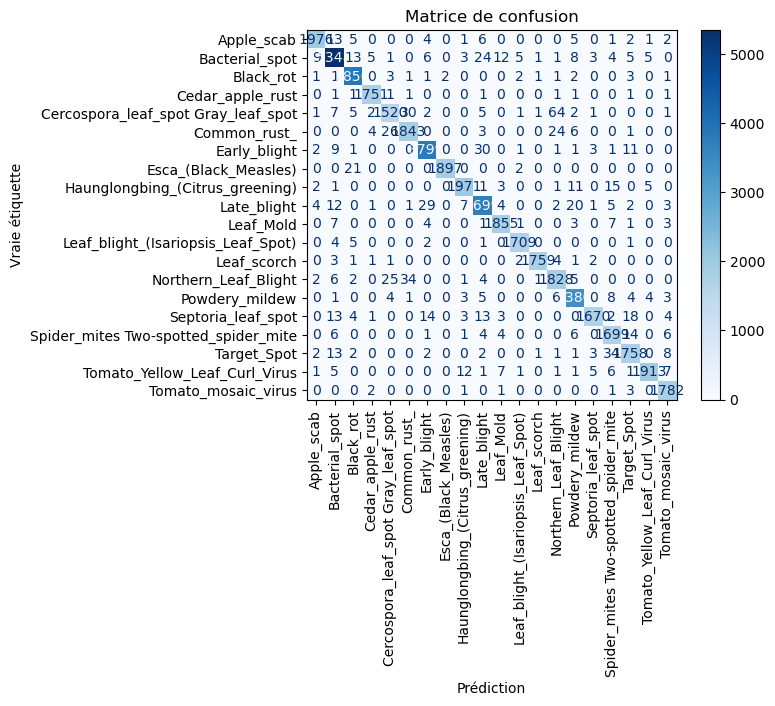

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

In [11]:
import joblib

joblib.dump(rf_model, 'rf_model_nom_maladie_no_bg.pkl')

['rf_model_nom_maladie_no_bg.pkl']

## Performances du modèle sur les données de test

In [12]:
data_no_bg_test = pd.read_csv('data_no_bg_test.csv')

data_no_bg_test

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
...,...,...,...,...
11995,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11996,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11997,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11998,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus


In [13]:
X_test = []
y_test = []

for img_path, label in zip(data_no_bg_test['img_path'], data_no_bg_test['nom_maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
accuracy = rf_model.score(X_test, y_test)

accuracy

0.8974166666666666